In [1]:
import os
import json
!export export CUDA_HOME="/usr/local/cuda-11.1" 
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.1'

## Dataset Overview

In [2]:
img_root = 'datasets/ActionGenome/frames_bicls'
ann_root = 'datasets/ActionGenome/anno_frames_bicls'
ann_list = []

with open(ann_root + '/scene_validation_annotations.json') as f:
  anno_list = json.load(f)
count = 0
for img in os.listdir(img_root):
  if img.endswith('.png'):
    count += 1
print("There is total %d images in the subset of Action Genome."%count)
print("An annotation example of a single frame is:\n", anno_list[100])

label_map = {}
count = 0
for sample in anno_list:
  if sample['label_name'] not in label_map:
    label_map[sample['label_name']] = sample['label_id']
    count += 1
print("There are total %d classes of labels for all the frames."%len(label_map))
print(label_map)
print("c097 here is Walking through a doorway")
print("c015 here is Holding a phone/camera")

There is total 400 images in the subset of Action Genome.
An annotation example of a single frame is:
 {'video_id': 'XF41L', 'image_id': 'XF41L_000054.png', 'label_name': 'c015', 'label_id': 1}
There are total 2 classes of labels for all the frames.
{'c097': 0, 'c015': 1}
c097 here is Walking through a doorway
c015 here is Holding a phone/camera


## Visualize Object Detection Results and Scene Validation Annotation

In [3]:
from tools.sg_visualization import *
import random

In [4]:
ann_root = "./datasets/ActionGenome/anno_frames_bicls"
custom_prediction = json.load(open(ann_root + '/custom_prediction.json'))
custom_data_info = json.load(open(ann_root + '/custom_data_info.json'))

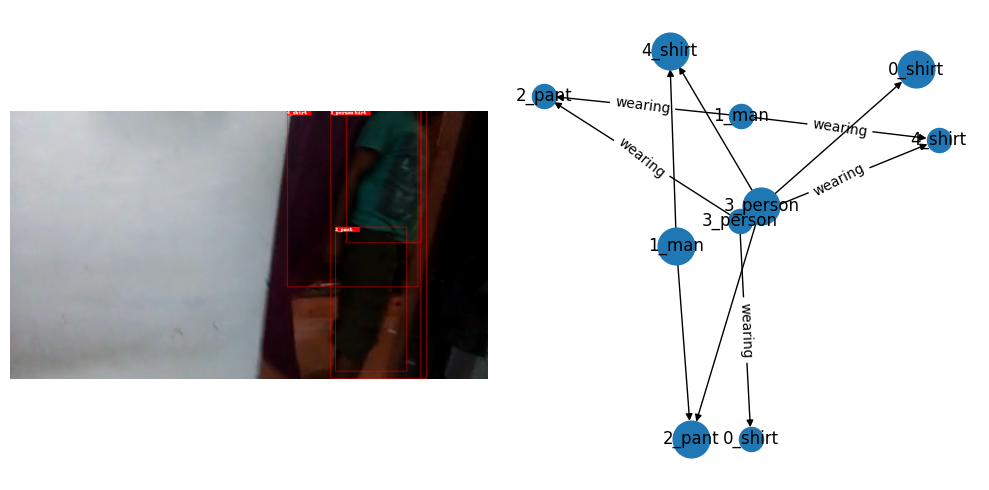

------------------------------
1_man => wearing => 4_shirt 0.6614704728126526
3_person => wearing => 4_shirt 0.6591272354125977
3_person => wearing => 2_pant 0.6561683416366577
1_man => wearing => 2_pant 0.638123095035553
3_person => wearing => 0_shirt 0.6162080764770508


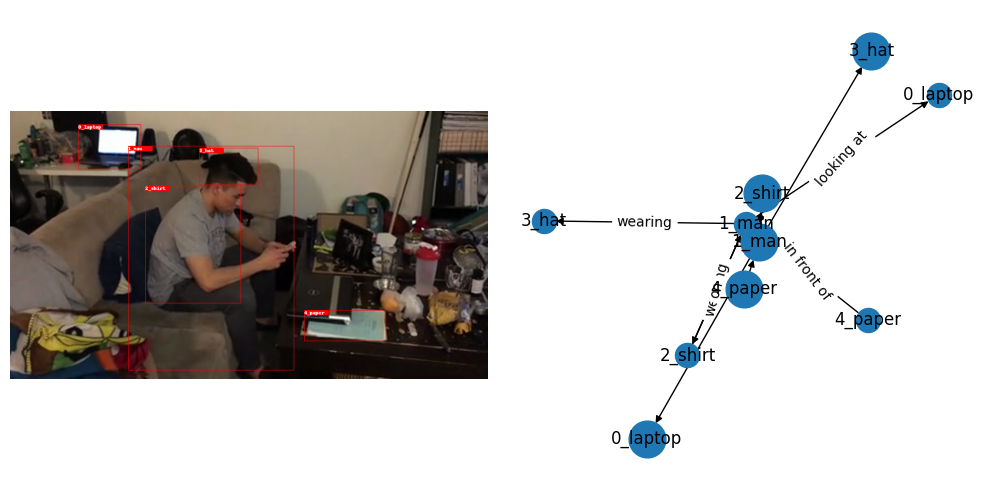

------------------------------
1_man => looking at => 0_laptop 0.676948070526123
1_man => wearing => 3_hat 0.61794513463974
1_man => wearing => 2_shirt 0.6154537200927734
2_shirt => on => 1_man 0.49529457092285156
4_paper => in front of => 1_man 0.43815603852272034


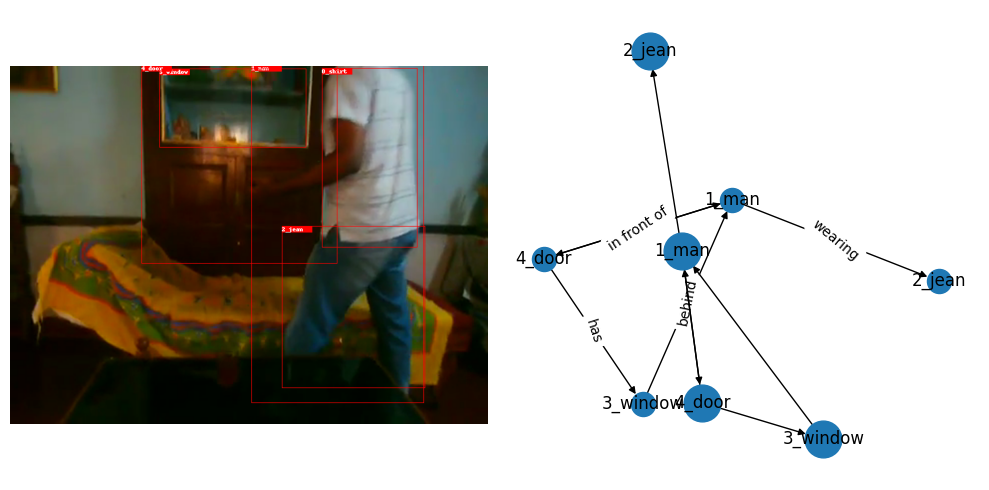

------------------------------
4_door => behind => 1_man 0.9017900824546814
3_window => behind => 1_man 0.6808388233184814
4_door => has => 3_window 0.6413646936416626
1_man => wearing => 2_jean 0.6375118494033813
1_man => in front of => 4_door 0.6332128643989563


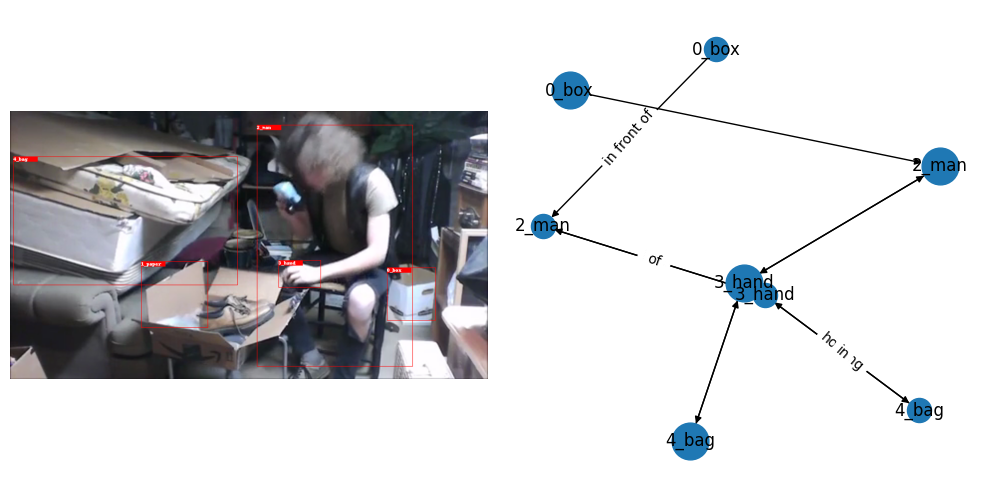

------------------------------
2_man => has => 3_hand 0.6315153241157532
3_hand => of => 2_man 0.6118077039718628
4_bag => in => 3_hand 0.5401795506477356
3_hand => holding => 4_bag 0.49320852756500244
0_box => in front of => 2_man 0.4620339870452881


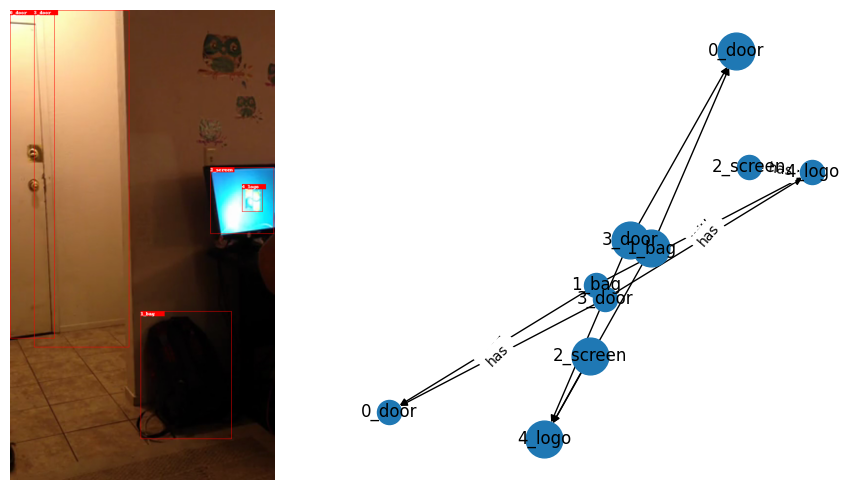

------------------------------
1_bag => with => 4_logo 0.5150230526924133
3_door => has => 4_logo 0.5042609572410583
2_screen => has => 4_logo 0.4911472201347351
3_door => has => 0_door 0.40848737955093384
1_bag => near => 0_door 0.3419252336025238


In [14]:
box_topk = 5 # select top k bounding boxes
rel_topk = 5 # select top k relationships

random_samples = 5
for i in range(0, random_samples):
    try:
        image_idx = random.randint(0,399)
        visualize_scene_graph(image_idx, box_topk, rel_topk,custom_prediction,custom_data_info) 
    except Exception as e:
        print("Error in image: ", e)